# Smapling method

## Performance Measure Techniques

6:2:2 비율로 많이 사용

- Training : Model Building
- Validation : Model Check
- Test : Model Evaluation

### Validation Set

- Test Set은 Model이 생성 시 절대 Training Set에 포함되지 않아야함

- Test Set과 달리 Model 생성시 Model에 성능을 평가하기 위해 사용

- Hyper Parameter Turning 시 성능 평가를 위해 Overfitting 방지

- Training 중간에 Model 성능 점검

## k-fold cross validation

- 학습 데이터를 k번 나눠서 Test와 Train을 실시 -> Test의 평균값을 사용
- 모델의 Parameter 튜닝, 간단한 모델의 최종 성능 측정 등 사용

![kfold](../../img/k_fold.png)

In [1]:
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import KFold

import warnings

warnings.filterwarnings(action ='ignore')

boston = datasets.load_boston()
X = boston.data
y = boston.target

kf = KFold(n_splits=10, shuffle =True)

for train_index, test_index in kf.split(X):
    print('TRAIN - ', 'len : ', len(train_index), train_index[:10] )
    print('TEST - ', 'len : ', len(test_index), test_index[:10])

TRAIN -  len :  455 [0 1 2 3 4 5 6 7 8 9]
TEST -  len :  51 [ 10  30  42  56  68  81  91 102 108 112]
TRAIN -  len :  455 [ 1  2  3  4  5  7  8 10 11 12]
TEST -  len :  51 [  0   6   9  46  59  71  95 100 101 106]
TRAIN -  len :  455 [ 0  2  3  4  5  6  7  8  9 10]
TEST -  len :  51 [ 1 23 25 34 37 53 55 62 66 73]
TRAIN -  len :  455 [ 0  1  2  3  4  6  7  9 10 12]
TEST -  len :  51 [ 5  8 11 13 31 35 36 39 43 51]
TRAIN -  len :  455 [0 1 2 3 4 5 6 7 8 9]
TEST -  len :  51 [ 22  28  33  44  70  76  83  87  99 110]
TRAIN -  len :  455 [0 1 2 3 4 5 6 7 8 9]
TEST -  len :  51 [16 21 32 47 64 72 77 82 84 89]
TRAIN -  len :  456 [ 0  1  2  5  6  7  8  9 10 11]
TEST -  len :  50 [  3   4  29  38  49  52  60  80  97 111]
TRAIN -  len :  456 [0 1 2 3 4 5 6 7 8 9]
TEST -  len :  50 [15 20 24 27 40 41 45 48 50 54]
TRAIN -  len :  456 [ 0  1  2  3  4  5  6  8  9 10]
TEST -  len :  50 [  7  17  18  57  69  78  85  90  98 103]
TRAIN -  len :  456 [ 0  1  3  4  5  6  7  8  9 10]
TEST -  len :  50 [ 

### 실제 모델에 적용 예시

In [2]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits = 10)
lasso_regressor = Lasso()
ridge_regressor = Ridge()

lasso_mse = []
ridge_mse = []

for train_index, test_index in kf.split(X):
    lasso_regressor.fit(X[train_index], y[train_index])
    ridge_regressor.fit(X[train_index], y[train_index])

    lasso_mse.append(
        mean_squared_error(y[test_index], lasso_regressor.predict(X[test_index]))
    )
    ridge_mse.append(
        mean_squared_error(y[test_index], ridge_regressor.predict(X[test_index]))
    )

# Average
sum(lasso_mse) / 10, sum(ridge_mse) / 10

(34.46408458830232, 34.07824620925927)

### 더 간단한 방법
- cross_val_score 함수로, 한번에 해결 가능

- sklearn은 pipeline등을 위해 'High is better'로 처리( MSE를 Negative로 변환)  
이로 인해 RMSE 지원 X

- cv : kfold split 횟수 만큼 cross validation score 계산

- neg : negative 작은게 좋은 걸로 인지

In [3]:
from sklearn.model_selection import cross_val_score
import numpy as np

lasso_regressor = Lasso(warm_start = False)
ridge_regressor = Ridge()

lasso_scores = cross_val_score(lasso_regressor, X, y, cv = 10, scoring = 'neg_mean_squared_error')
ridge_scores = cross_val_score(ridge_regressor, X, y, cv = 10, scoring = 'neg_mean_squared_error')

np.mean(lasso_scores), np.mean(ridge_scores)


(-34.46408458830232, -34.07824620925927)

> cross_validate 보다는 cross_val_score를 자주 사용

In [4]:
from sklearn.model_selection import cross_validate
import numpy as np

lasso_regressor = Lasso(warm_start = False)
ridge_regressor = Ridge()

lasso_scores = cross_validate(lasso_regressor, X, y, cv = 10, scoring = 'neg_mean_squared_error')
ridge_scores = cross_validate(ridge_regressor, X, y, cv = 10, scoring = 'neg_mean_squared_error')
ridge_scores

{'fit_time': array([0.0008769 , 0.00099301, 0.00082994, 0.00116992, 0.00089598,
        0.00076795, 0.00082612, 0.00096321, 0.00125384, 0.00098109]),
 'score_time': array([0.00040507, 0.000489  , 0.00041389, 0.00042176, 0.00041294,
        0.00039601, 0.00039697, 0.00046587, 0.00052929, 0.00036597]),
 'test_score': array([  -9.31766315,  -12.60806897,  -10.79859434,  -36.6093648 ,
         -29.62109212,  -18.62598134,   -9.46641896, -168.49831117,
         -33.79749469,  -11.43947255])}

## Leave One Out (LOO) - 잘 안 씀

- Simple cross validation  k = data size
- 한번에 한 개의 data만 Test set으로 사용함  총 k번 iteration
- 속도 오래 걸림

In [6]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

lasso_scores = cross_val_score(lasso_regressor, X, y, cv = loo, scoring = 'neg_mean_squared_error')
ridge_scores = cross_val_score(ridge_regressor, X, y, cv = loo, scoring = 'neg_mean_squared_error')

np.mean(lasso_scores), np.mean(ridge_scores)

(-28.409266762049334, -23.862836317209972)

##  Validation set for parameter turning
- Validation set의 많은 이유 중 하나가 Hyper parameter turning

- Number of iterations (SGD), Number of branch (Tree-based) etc.

- Validation set의 성능으로 최적의 parameter 찾음

- Validation set 결과와 Training set 결과의 차이가 벌어지면 Overfitting

In [8]:
def rmse(predictions, targets):
    return np.sqrt(( (predictions - targets)**2 ).mean())

In [7]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X)
X_scaled = std.transform(X)

# Learning rate
eta0 = 0.00000001
max_iter = 10000

- cold_start : 아무것도 주어지지 않은 경우 추천
- warm_start : 이전에 학습한 coef, intercept가 주어진 경우 True
- learning_rate = 'constant' : learning rate가 변하지 않음

In [12]:
from sklearn.model_selection import train_test_split

X_train_dataset, X_test, y_train_dataset, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42)

sgd_regressor = SGDRegressor(
    eta0 = eta0, max_iter = max_iter, warm_start =True, learning_rate = 'constant')

rmse_val_score = []
rmse_train_score = []
model_list = []

X_train, X_val, y_train, y_val = train_test_split(
    X_train_dataset, y_train_dataset, test_size = 0.2, random_state =42)

sgd_regressor.fit(X_train, y_train)

# kf = KFold(n_splits = 100, shuffle = True)
#   for train_index, test_index in kf.split(X_train_dataset):

for i in range(200):
    y_pred = sgd_regressor.predict(X_train)
    y_true = y_train
    rmse_train_score.append( rmse(y_pred, y_true) )

    y_pred = sgd_regressor.predict(X_val)
    y_true = y_val
    rmse_val_score.append( rmse(y_pred, y_true) )
    model_list.append(sgd_regressor)    
    
    # warm start를 위해 기존 학습한 값 저장
    coef = sgd_regressor.coef_.copy()
    intercept = sgd_regressor.intercept_.copy()

    sgd_regressor = SGDRegressor(
        eta0 = eta0, max_iter = max_iter, warm_start =True, learning_rate = 'constant')
    # 초기 coef, intercept 지정
    sgd_regressor.fit(X_train, y_train, coef_init = coef, intercept_init = intercept)

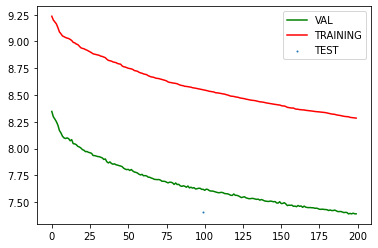

In [13]:
import matplotlib.pyplot as plt

plt.plot( range(len(rmse_val_score)), rmse_val_score, c = 'g', label = 'VAL')
plt.plot( range(len(rmse_train_score)), rmse_train_score, c = 'r', label = 'TRAINING')
plt.scatter( 99, rmse(y_test, sgd_regressor.predict(X_test)), s=1, label = 'TEST')
plt.legend()
plt.show()

In [14]:
np.argsort(rmse_val_score)

array([194, 196, 199, 198, 195, 197, 191, 193, 192, 190, 188, 187, 189,
       186, 184, 183, 181, 185, 182, 180, 179, 178, 176, 175, 177, 174,
       172, 173, 171, 170, 168, 169, 167, 164, 166, 160, 158, 162, 165,
       159, 163, 154, 161, 156, 155, 157, 153, 150, 151, 148, 147, 152,
       145, 149, 146, 144, 142, 141, 140, 143, 139, 136, 138, 137, 134,
       135, 133, 129, 130, 132, 131, 128, 127, 124, 125, 123, 126, 122,
       118, 120, 121, 117, 116, 119, 115, 114, 113, 109, 112, 110, 108,
       111, 107, 106, 104, 105, 103, 100, 102,  98,  99, 101,  94,  95,
        97,  96,  92,  90,  93,  91,  88,  85,  87,  89,  84,  86,  82,
        80,  83,  81,  79,  76,  77,  78,  75,  74,  73,  72,  71,  69,
        70,  68,  67,  66,  65,  64,  63,  62,  60,  61,  58,  59,  57,
        56,  55,  54,  53,  51,  49,  52,  50,  48,  47,  46,  45,  44,
        43,  42,  40,  41,  39,  37,  38,  36,  34,  35,  33,  32,  31,
        30,  29,  28,  27,  26,  25,  24,  22,  23,  21,  20,  1

In [16]:
model_list[194].coef_
rmse(y_test, model_list[194].predict(X_test))


7.388283395211146

## ETC

- RepeatedKFold : 중복이 포함된 K-Fold 생성
- LeavePOut : 한번에 P개를 뽑음 (Not LOO for one data)
- shuffleSplit : 독립적인(중복되는) data Sampling
- <b style= 'color: green'>StratifiedKFold : Y값 비율에 따라 뽑음, 층화추출 ex) 암 환자 구분</b>
- GroupKFold : 그룹별로 데이터 Sampling